In [19]:
from scipy import *
import numpy as np
from scipy.optimize import curve_fit
import matplotlib
from pylab import *

def curve_fit_custom(f, xdata, ydata, p0=None, sigma=None, **kw):
    """
    Pass all arguments to curve_fit, which uses non-linear least squares
    to fit a function, f, to data.  Calculate the uncertaities in the
    fit parameters from the covariance matrix.
    """
    popt, pcov = curve_fit(f, xdata, ydata, p0, sigma, **kw)

    if sigma is None:
        chi2 = sum(((f(xdata,*popt)-ydata))**2)
    else:
        chi2 = sum(((f(xdata,*popt)-ydata)/sigma)**2)
    dof = len(ydata) - len(popt)
    rchi2 = chi2/dof
    print ('results of general_fit:')
    print ('   chi squared = ', chi2)
    print ('   degrees of freedom = ', dof)
    print ('   reduced chi squared = ', rchi2)

    # The uncertainties are the square roots of the diagonal elements
    punc = zeros(len(popt))
    for i in arange(0,len(popt)):
        punc[i] = sqrt(pcov[i,i])
    return popt, punc, rchi2, dof

from scipy.stats import chi2
import matplotlib.patches as mpatches
from matplotlib.pyplot import errorbar
import math as m
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Part 4

results of general_fit:
   chi squared =  0.0009507959406218837
   degrees of freedom =  5
   reduced chi squared =  0.00019015918812437675
k= 0.9992436161315984
k-unc= 0.0008244377430854138
c= 0.27746512837273996
c-unc= 0.00889055411470105


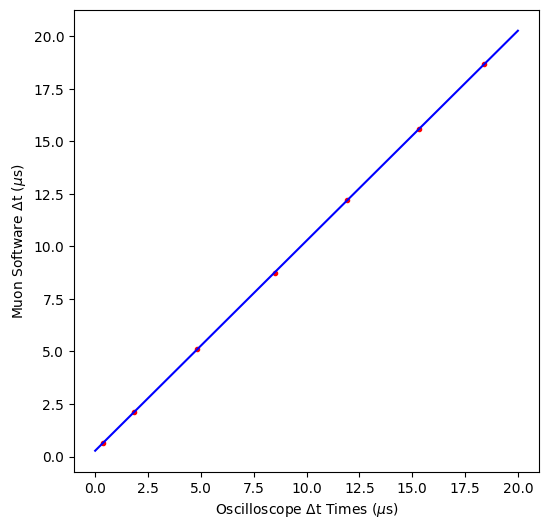

In [40]:
# Part a
oscillTimes = np.array([0.374, 1.84, 4.81, 8.49, 11.92, 15.33, 18.39]) # microseconds
softTimes = np.array([0.64, 2.12, 5.1, 8.75,12.2, 15.58, 18.66]) # oscilloscope microseconds
#x = [1,2,3,4,5,6,7]
pg = [1.0,1.0]
def f(x,k,c):
    return k*x+c

(popt, punc, rc, d) = curve_fit_custom(f, oscillTimes, softTimes,pg)
print('k=',popt[0])
print('k-unc=',punc[0])
print('c=',popt[1])
print('c-unc=',punc[1])
x = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
fit = f(x, k = popt[0], c = popt[1])

figure(figsize=(6,6))
plot(oscillTimes, softTimes, 'r.')
plot(x, fit, 'b-')
xlabel(r'Oscilloscope $\Delta$t Times ($\mu$s)')
ylabel(r'Muon Software $\Delta$t ($\mu$s)')
show()

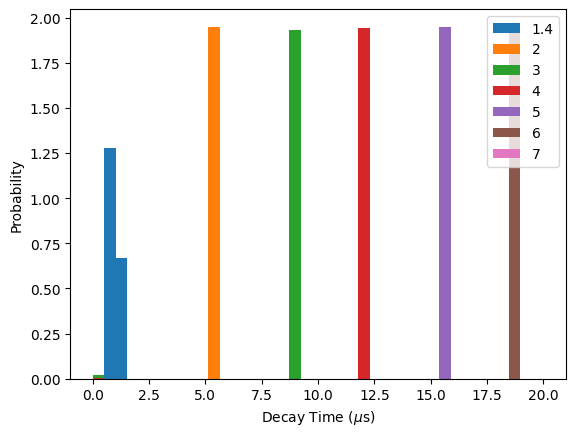

In [21]:
bins = np.linspace(0, 20, 40)

udecayt14 =loadtxt('ps=1.4.data',delimiter=' ',usecols=(0),skiprows=0,unpack=True)
udecayt2 =loadtxt('ps=2.data',delimiter=' ',usecols=(0),skiprows=0,unpack=True)
udecayt3 =loadtxt('ps=3.data',delimiter=' ',usecols=(0),skiprows=0,unpack=True)
udecayt4 =loadtxt('ps=4.data',delimiter=' ',usecols=(0),skiprows=0,unpack=True)
udecayt5 =loadtxt('ps=5.data',delimiter=' ',usecols=(0),skiprows=0,unpack=True)
udecayt6 =loadtxt('ps=6.data',delimiter=' ',usecols=(0),skiprows=0,unpack=True)
udecayt7 =loadtxt('ps=7.data',delimiter=' ',usecols=(0),skiprows=0,unpack=True)


decayt14 = []
decayt2 = []
decayt3 = []
decayt4 = []
decayt5 = []
decayt6 = []
decayt7 = []
for i in range(0, len(udecayt14), 1):
    if (udecayt14[i] < 20000):
        decayt14.append(udecayt14[i]/1000)

for i in range(0, len(udecayt2), 1):
    if (udecayt2[i] < 20000):
        decayt2.append(udecayt2[i]/1000)

for i in range(0, len(udecayt3), 1):
    if (udecayt3[i] < 20000):
        decayt3.append(udecayt3[i]/1000)

for i in range(0, len(udecayt4), 1):
    if (udecayt4[i] < 20000):
        decayt4.append(udecayt4[i]/1000)

for i in range(0, len(udecayt5), 1):
    if (udecayt5[i] < 20000):
        decayt5.append(udecayt5[i]/1000)

for i in range(0, len(udecayt6), 1):
    if (udecayt6[i] < 20000):
        decayt6.append(udecayt6[i]/1000)

for i in range(0, len(udecayt7), 1):
    if (udecayt7[i] < 20000):
        decayt7.append(udecayt7[i]/1000)

plt.hist(decayt14, bins,density = True, label='1.4')
plt.hist(decayt2, bins,density = True, label='2')
plt.hist(decayt3, bins,density = True, label='3')
plt.hist(decayt4, bins,density = True, label='4')
plt.hist(decayt5, bins,density = True, label='5')
plt.hist(decayt6, bins,density = True, label='6')
plt.hist(decayt7, bins,density = True, label='7')
xlabel(r'Decay Time ($\mu$s)')
ylabel(r'Probability')

legend(loc='upper right') 
show()

# Part 5

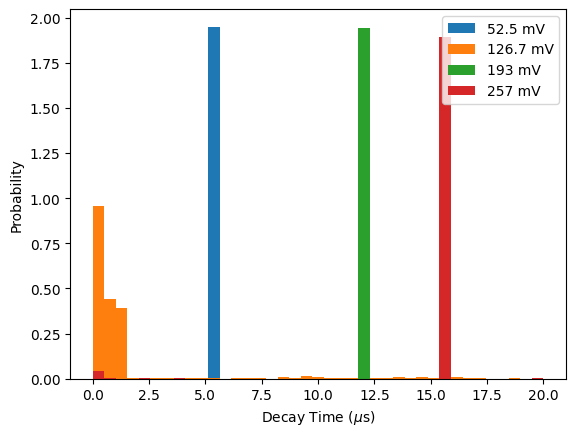

In [42]:
control = [1,2,3,4,5,6,7,8,9,10]
scopeVoltages = [0, 47.8,125.1, 189.5,257,318,381,435,494,543] # mV

udecayt3 =loadtxt('C=2.data',delimiter=' ',usecols=(0),skiprows=0,unpack=True)
udecayt5 =loadtxt('C=3.data',delimiter=' ',usecols=(0),skiprows=0,unpack=True)
udecayt9 =loadtxt('c=4.data',delimiter=' ',usecols=(0),skiprows=0,unpack=True)
udecayt9 =loadtxt('c=5.data',delimiter=' ',usecols=(0),skiprows=0,unpack=True)

decayt2 = []
decayt3 = []
decayt4 = []
decayt4 = []


for i in range(0, len(udecayt2), 1):
    if (udecayt2[i] < 20000):
        decayt2.append(udecayt2[i]/1000)

for i in range(0, len(udecayt3), 1):
    if (udecayt3[i] < 20000):
        decayt3.append(udecayt3[i]/1000)

for i in range(0, len(udecayt4), 1):
    if (udecayt4[i] < 20000):
        decayt4.append(udecayt4[i]/1000)
        
for i in range(0, len(udecayt5), 1):
    if (udecayt5[i] < 20000):
        decayt5.append(udecayt5[i]/1000)



plt.hist(decayt2, bins,density = True, label='52.5 mV')
plt.hist(decayt3, bins,density = True, label='126.7 mV')
plt.hist(decayt4, bins,density = True, label='193 mV')
plt.hist(decayt5, bins,density = True, label='257 mV')
xlabel(r'Decay Time ($\mu$s)')
ylabel(r'Probability')
legend(loc='upper right') 
show()


# Part 6

len 600:  17
len 800:  46
len 1000:  77


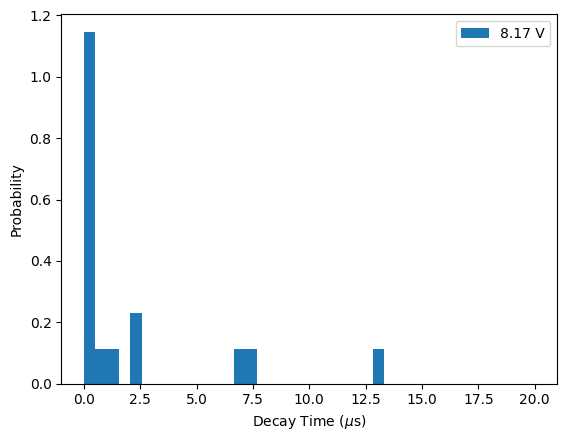

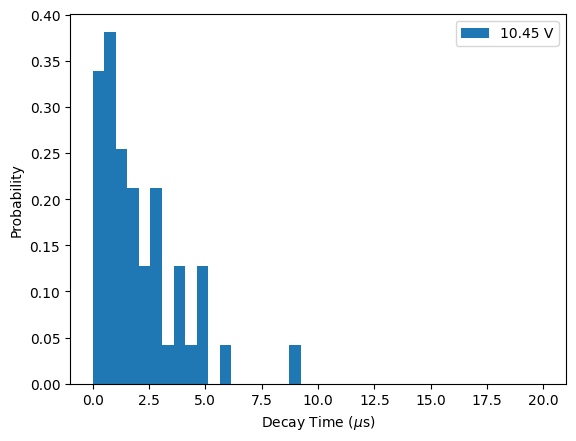

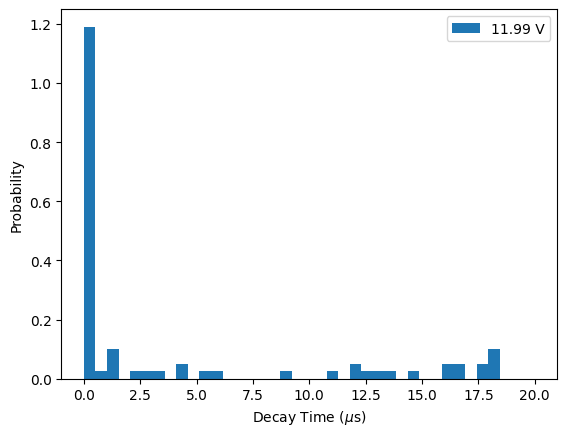

In [39]:


udecayt6h =loadtxt('hv=600.data',delimiter=' ',usecols=(0),skiprows=0,unpack=True)
udecayt8h =loadtxt('hv=800.data',delimiter=' ',usecols=(0),skiprows=0,unpack=True)
udecayt1k =loadtxt('hv=1000.data',delimiter=' ',usecols=(0),skiprows=0,unpack=True)

decayt6h = []
decayt8h = []
decayt1k = []

for i in range(0, len(udecayt6h), 1):
    if (udecayt6h[i] < 20000):
        decayt6h.append(udecayt6h[i]/1000)

for i in range(0, len(udecayt8h), 1):
    if (udecayt8h[i] < 20000):
        decayt8h.append(udecayt8h[i]/1000)

for i in range(0, len(udecayt1k), 1):
    if (udecayt1k[i] < 20000):
        decayt1k.append(udecayt1k[i]/1000)
print("len 600: ", len(decayt6h))
print("len 800: ", len(decayt8h))
print("len 1000: ", len(decayt1k))
plt.hist(decayt6h, bins,density = True, label='8.17 V')
#plt.hist(decayt5, bins,density = True, label='5')
#plt.hist(decayt9, bins,density = True, label='9')
xlabel(r'Decay Time ($\mu$s)')
ylabel(r'Probability')
legend(loc='upper right') 
show()
plt.hist(decayt8h, bins,density = True, label='10.45 V')
xlabel(r'Decay Time ($\mu$s)')
ylabel(r'Probability')
legend(loc='upper right') 
show()

plt.hist(decayt1k, bins,density = True, label='11.99 V')
xlabel(r'Decay Time ($\mu$s)')
ylabel(r'Probability')
legend(loc='upper right') 
show()
